In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score # Import metrics
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import metrics including confusion_matrix


data = pd.read_csv("/content/drive/MyDrive/AI_SEM3/Datasets/diabetes.csv")
(data.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
columns_to_impute = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_impute:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)


In [ ]:
(data[columns_to_impute].describe())


,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,69.105469,20.536458,79.799479,31.992578
std,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000
25%,62.000000,0.000000,0.000000,27.300000
50%,72.000000,23.000000,30.500000,32.000000
75%,80.000000,32.000000,127.250000,36.600000
max,122.000000,99.000000,846.000000,67.100000


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Regression Task - Predicting Blood Pressure

In [ ]:
X_regression = data.drop(columns=['BloodPressure', 'Outcome'])
X_regression


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,35,0,33.6,0.627,50
1,1,85,29,0,26.6,0.351,31
2,8,183,0,0,23.3,0.672,32
3,1,89,23,94,28.1,0.167,21
4,0,137,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63
764,2,122,27,0,36.8,0.340,27
765,5,121,23,112,26.2,0.245,30
766,1,126,0,0,30.1,0.349,47


In [ ]:
x=X_regression.values
x

array([[  6.   , 148.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y_regression = data['BloodPressure']
y_regression

,BloodPressure
0,72
1,66
2,64
3,66
4,40
...,...
763,76
764,70
765,72
766,60


In [ ]:
y=y_regression.values
y

array([ 72,  66,  64,  66,  40,  74,  50,   0,  70,  96,  92,  74,  80,
        60,  72,   0,  84,  74,  30,  70,  88,  84,  90,  80,  94,  70,
        76,  66,  82,  92,  75,  76,  58,  92,  78,  60,  76,  76,  68,
        72,  64,  84,  92, 110,  64,  66,  56,  70,  66,   0,  80,  50,
        66,  90,  66,  50,  68,  88,  82,  64,   0,  72,  62,  58,  66,
        74,  88,  92,  66,  85,  66,  64,  90,  86,  75,  48,  78,  72,
         0,  66,  44,   0,  78,  65, 108,  74,  72,  68,  70,  68,  55,
        80,  78,  72,  82,  72,  62,  48,  50,  90,  72,  60,  96,  72,
        65,  56, 122,  58,  58,  85,  72,  62,  76,  62,  54,  92,  74,
        48,  60,  76,  76,  64,  74,  80,  76,  30,  70,  58,  88,  84,
        70,  56,  64,  74,  68,  60,  70,  60,  80,  72,  78,  82,  52,
        66,  62,  75,  80,  64,  78,  70,  74,  65,  86,  82,  78,  88,
        52,  56,  74,  72,  90,  74,  80,  64,  88,  74,  66,  68,  66,
        90,  82,  70,   0,  60,  64,  72,  78, 110,  78,  82,  8

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train:", X_train_reg)
print("X_test:", X_test_reg)
print("y_train:", y_train_reg)
print("y_test:", y_test_reg)

X_train: [[  2.     84.      0.    ...   0.      0.304  21.   ]
 [  9.    112.     24.    ...  28.2     1.282  50.   ]
 [  1.    139.     19.    ...  28.7     0.654  22.   ]
 ...
 [ 10.    101.     37.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.      0.    ...  22.5     0.262  21.   ]]
X_test: [[  6.     98.     33.    ...  34.      0.43   43.   ]
 [  2.    112.     32.    ...  35.7     0.148  21.   ]
 [  2.    108.      0.    ...  30.8     0.158  21.   ]
 ...
 [  8.     95.      0.    ...  36.8     0.485  57.   ]
 [  2.    146.     38.    ...  28.      0.337  29.   ]
 [  8.     74.     40.    ...  35.3     0.705  39.   ]]
y_train: [  0  82  46  50  80  70   0  68  60  55  60  72  74  85  68  56  64  66
  62 100  84  86  60  84  74  88  82  82  76  94  78  70  74  64  78  72
  50  72   0  86  82  72  75  54  62  64  74  78  76  58  84  76  58  88
  68  90  74  76  58  65  94  56  90  70  84  70  72  78  50  74  62   0
   0  64  

In [ ]:
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train_reg, y_train_reg)

y_pred_log_reg = log_reg_model.predict(X_test_reg)
print("Logistic Regression Results")
print(classification_report(y_test_reg, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test_reg, y_pred_log_reg)}")

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.21      0.36      0.27        11
          48       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         2
          54       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         6
          60       0.00      0.00      0.00        11
          62       0.00      0.00      0.00         6
          64       0.12      0.43      0.18         7
          65       0.00      0.00      0.00         3
          66       0.00      0.00      0.00         6
          68       0.00      0.00      0.00         5
          70       0.15      0.27      0.19        11
          72       0.00      0.00      0.00        10
          74       0.07      0.12      0.09         8
          75       0.00      0.00      0.00         4

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_reg, y_train_reg)

y_pred_knn = knn_model.predict(X_test_reg)
print(classification_report(y_test_reg, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test_reg, y_pred_knn)}")

              precision    recall  f1-score   support

          24       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         0
          48       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         2
          54       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         2
          58       0.22      0.33      0.27         6
          60       0.11      0.09      0.10        11
          61       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         6
          64       0.00      0.00      0.00         7
          65       0.00      0.00      0.00         3
          66       0.09      0.17      0.12         6
          68       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

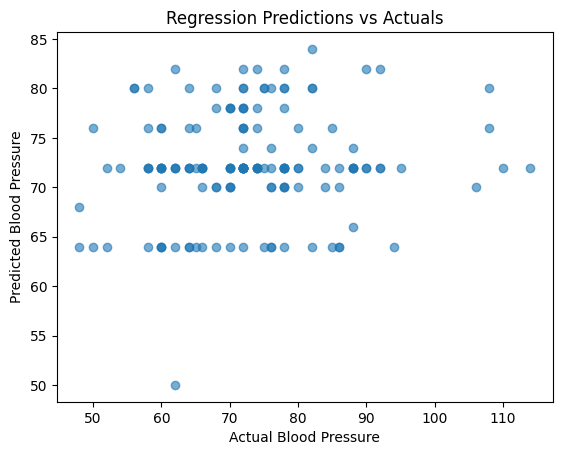

In [ ]:
y_pred_reg = log_reg_model.predict(X_test_reg)

plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('Regression Predictions vs Actuals')
plt.show()


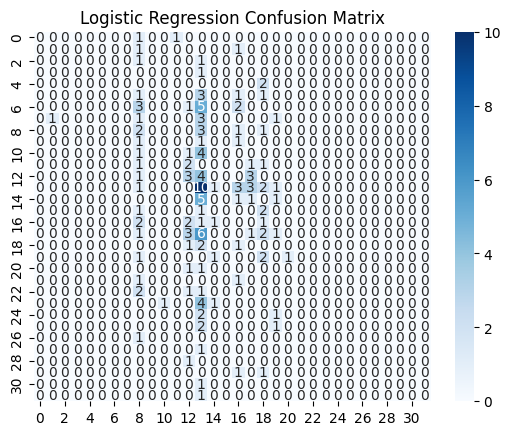

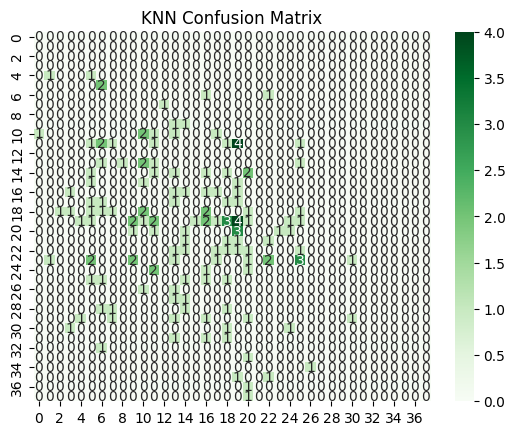

In [ ]:
# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test_reg, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test_reg, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.show()